<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day5_drop_the_overfitting_regularizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기


In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

#데이터 다운로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std


#학습데이터 검증 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)
print('data ready~')


170500096/170498071 [==============================] - 11s 0us/step
data ready~


규제화 함수 설정하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
model = Sequential()
# 입력 데이터는 (32, 32, 3)의 형태를 가집니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(10, activation = 'softmax'))


모델 설정

In [ ]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])


모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))


Epoch 1/30
1094/1094 [==============================] - 17s 15ms/step - loss: 2.1149 - acc: 0.4041 - val_loss: 1.8236 - val_acc: 0.5039
Epoch 2/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.6599 - acc: 0.5479 - val_loss: 1.5607 - val_acc: 0.5799
Epoch 3/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.4605 - acc: 0.6139 - val_loss: 1.3984 - val_acc: 0.6338
Epoch 4/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.3116 - acc: 0.6625 - val_loss: 1.3259 - val_acc: 0.6544
Epoch 5/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.1939 - acc: 0.6969 - val_loss: 1.2600 - val_acc: 0.6771
Epoch 6/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.0980 - acc: 0.7292 - val_loss: 1.1813 - val_acc: 0.6942
Epoch 7/30
1094/1094 [==============================] - 16s 14ms/step - loss: 1.0126 - acc: 0.7557 - val_loss: 1.1294 - val_acc: 0.7181
Epoch 8/30
1094/1094 [==========================

학습 과정 그려보기

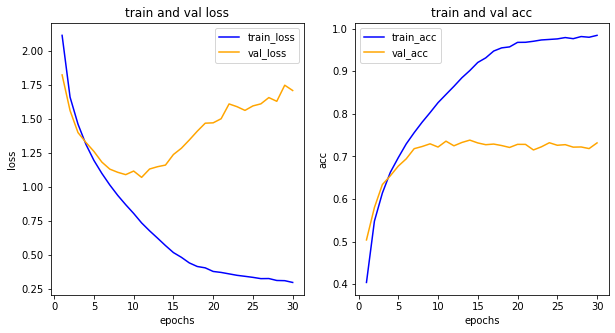

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


모델 평가하기

In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 7ms/step - loss: 1.8032 - acc: 0.7247


[1.8032498359680176, 0.7246999740600586]